In [23]:
%matplotlib inline




print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score




from matplotlib.pyplot import rcParams

rcParams["figure.figsize"] = 14,8

Automatically created module for IPython interactive environment



=======================================
Receiver Operating Characteristic (ROC)
=======================================

Example of Receiver Operating Characteristic (ROC) metric to evaluate
classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false
positive rate on the X axis. This means that the top left corner of the plot is
the "ideal" point - a false positive rate of zero, and a true positive rate of
one. This is not very realistic, but it does mean that a larger area under the
curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize
the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of
a classifier. In order to extend ROC curve and ROC area to multi-label
classification, it is necessary to binarize the output. One ROC
curve can be drawn per label, but one can also draw a ROC curve by considering
each element of the label indicator matrix as a binary prediction
(micro-averaging).

Another evaluation measure for multi-label classification is
macro-averaging, which gives equal weight to the classification of each
label.

<div class="alert alert-info"><h4>Note</h4><p>See also :func:`sklearn.metrics.roc_auc_score`,
             `sphx_glr_auto_examples_model_selection_plot_roc_crossval.py`</p></div>


In [9]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [11]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [12]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [13]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)


In [14]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,  random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [34]:
roc_curve(y_test.ravel(), y_score.ravel())

(array([0.        , 0.00666667, 0.02      , 0.02      , 0.04      ,
        0.04      , 0.06666667, 0.06666667, 0.1       , 0.1       ,
        0.10666667, 0.10666667, 0.11333333, 0.11333333, 0.20666667,
        0.20666667, 0.21333333, 0.21333333, 0.22666667, 0.22666667,
        0.24      , 0.24      , 0.26666667, 0.26666667, 0.28666667,
        0.28666667, 0.31333333, 0.31333333, 0.34      , 0.34      ,
        0.34666667, 0.34666667, 0.4       , 0.4       , 0.40666667,
        0.40666667, 0.41333333, 0.41333333, 0.44      , 0.44      ,
        0.45333333, 0.45333333, 0.46      , 0.46      , 0.48      ,
        0.48      , 0.5       , 0.5       , 0.54      , 0.54      ,
        0.56666667, 0.56666667, 0.58666667, 0.58666667, 0.59333333,
        0.59333333, 0.62666667, 0.62666667, 0.68666667, 0.68666667,
        0.69333333, 0.69333333, 0.70666667, 0.70666667, 0.71333333,
        0.71333333, 0.73333333, 0.73333333, 0.74      , 0.74      ,
        0.76666667, 0.76666667, 0.79333333, 0.79

In [16]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [27]:
fpr

{0: array([0.        , 0.01851852, 0.05555556, 0.05555556, 0.11111111,
        0.11111111, 0.18518519, 0.18518519, 0.27777778, 0.27777778,
        0.2962963 , 0.2962963 , 0.31481481, 0.31481481, 0.57407407,
        0.57407407, 0.59259259, 0.59259259, 0.62962963, 0.62962963,
        0.66666667, 0.66666667, 0.72222222, 0.72222222, 0.77777778,
        0.77777778, 0.83333333, 0.83333333, 0.90740741, 0.90740741,
        1.        ]),
 1: array([0.        , 0.02222222, 0.02222222, 0.04444444, 0.04444444,
        0.11111111, 0.11111111, 0.13333333, 0.13333333, 0.22222222,
        0.22222222, 0.31111111, 0.31111111, 0.35555556, 0.35555556,
        0.37777778, 0.37777778, 0.4       , 0.4       , 0.44444444,
        0.44444444, 0.46666667, 0.46666667, 0.53333333, 0.53333333,
        0.62222222, 0.62222222, 0.73333333, 0.73333333, 0.77777778,
        0.77777778, 0.84444444, 0.84444444, 0.88888889, 0.88888889,
        0.93333333, 0.93333333, 0.95555556, 0.95555556, 1.        ,
        1.        ])

In [29]:
fpr[0]

array([0.        , 0.01851852, 0.05555556, 0.05555556, 0.11111111,
       0.11111111, 0.18518519, 0.18518519, 0.27777778, 0.27777778,
       0.2962963 , 0.2962963 , 0.31481481, 0.31481481, 0.57407407,
       0.57407407, 0.59259259, 0.59259259, 0.62962963, 0.62962963,
       0.66666667, 0.66666667, 0.72222222, 0.72222222, 0.77777778,
       0.77777778, 0.83333333, 0.83333333, 0.90740741, 0.90740741,
       1.        ])

In [31]:
fpr["micro"]

array([0.        , 0.00666667, 0.02      , 0.02      , 0.04      ,
       0.04      , 0.06666667, 0.06666667, 0.1       , 0.1       ,
       0.10666667, 0.10666667, 0.11333333, 0.11333333, 0.20666667,
       0.20666667, 0.21333333, 0.21333333, 0.22666667, 0.22666667,
       0.24      , 0.24      , 0.26666667, 0.26666667, 0.28666667,
       0.28666667, 0.31333333, 0.31333333, 0.34      , 0.34      ,
       0.34666667, 0.34666667, 0.4       , 0.4       , 0.40666667,
       0.40666667, 0.41333333, 0.41333333, 0.44      , 0.44      ,
       0.45333333, 0.45333333, 0.46      , 0.46      , 0.48      ,
       0.48      , 0.5       , 0.5       , 0.54      , 0.54      ,
       0.56666667, 0.56666667, 0.58666667, 0.58666667, 0.59333333,
       0.59333333, 0.62666667, 0.62666667, 0.68666667, 0.68666667,
       0.69333333, 0.69333333, 0.70666667, 0.70666667, 0.71333333,
       0.71333333, 0.73333333, 0.73333333, 0.74      , 0.74      ,
       0.76666667, 0.76666667, 0.79333333, 0.79333333, 0.80666

In [30]:
tpr

{0: array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
        0.19047619, 0.19047619, 0.42857143, 0.42857143, 0.47619048,
        0.47619048, 0.52380952, 0.52380952, 0.57142857, 0.57142857,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.71428571,
        0.71428571, 0.76190476, 0.76190476, 0.85714286, 0.85714286,
        0.9047619 , 0.9047619 , 0.95238095, 0.95238095, 1.        ,
        1.        ]),
 1: array([0.        , 0.        , 0.06666667, 0.06666667, 0.13333333,
        0.13333333, 0.16666667, 0.16666667, 0.2       , 0.2       ,
        0.26666667, 0.26666667, 0.33333333, 0.33333333, 0.46666667,
        0.46666667, 0.5       , 0.5       , 0.53333333, 0.53333333,
        0.56666667, 0.56666667, 0.6       , 0.6       , 0.63333333,
        0.63333333, 0.66666667, 0.66666667, 0.7       , 0.7       ,
        0.73333333, 0.73333333, 0.8       , 0.8       , 0.83333333,
        0.83333333, 0.86666667, 0.86666667, 0.96666667, 0.96666667,
        1.        ])

In [33]:
roc_auc

{0: 0.5890652557319224,
 1: 0.5133333333333333,
 2: 0.5359477124183006,
 'micro': 0.45431111111111117,
 'macro': 0.5574286319466059}

Plot of a ROC curve for a specific class



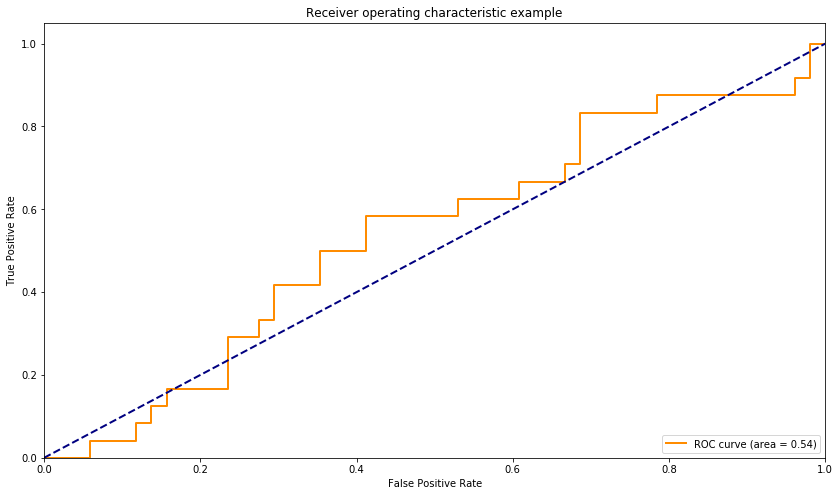

In [24]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Plot ROC curves for the multilabel problem
..........................................
Compute macro-average ROC curve and ROC area



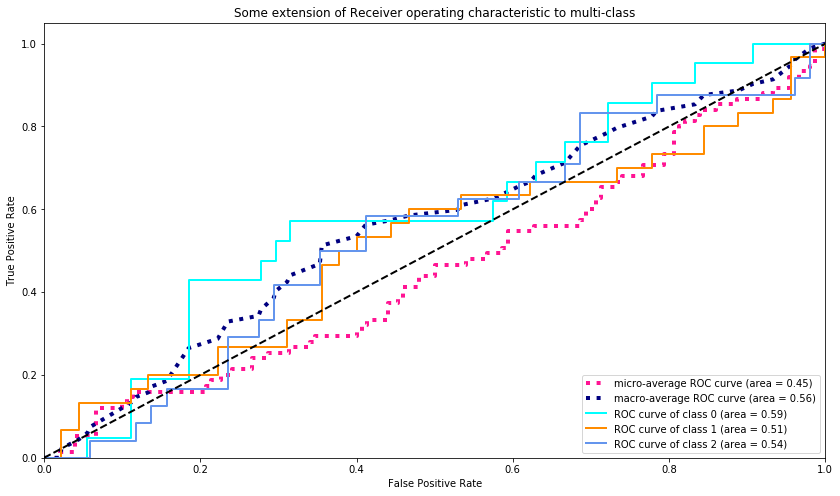

In [25]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Area under ROC for the multiclass problem
.........................................
The :func:`sklearn.metrics.roc_auc_score` function can be used for
multi-class classification. The multi-class One-vs-One scheme compares every
unique pairwise combination of classes. In this section, we calculate the AUC
using the OvR and OvO schemes. We report a macro average, and a
prevalence-weighted average.



In [26]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.513261 (macro),
0.508102 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.513261 (macro),
0.508102 (weighted by prevalence)
